In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model

In [ ]:
input = np.array([[3,4,5], [5,6,7], [7,8,9]])
kernal = np.array([[2,3], [3,4]])

In [ ]:
output_height = len(input) - len(kernal) + 1
output_width = len(input[0]) - len(kernal[0]) + 1
output = np.array([[0, 0], [0, 0]])
for i in range(0, output_height):
  for j in range(0, output_width):
    for ii in range(0, 2):
      for jj in range(0, 2):
        output[i, j] += input[i + ii, j + jj] * kernal[ii, jj]

In [ ]:
print(output)

[[57 69]
 [81 93]]


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train, X_test = X_train / 255, X_test / 255
print('X_train.shape : ', X_train.shape)

X_train.shape :  (60000, 28, 28)


In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)

(60000, 28, 28, 1)


In [ ]:
K = len(set(y_train))

In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', strides=2)(i)
x = Conv2D(64, (3, 3), activation='relu', strides=2)(x)
x = Conv2D(128, (3, 3), activation='relu', strides=2)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
x = Dropout(0.2)(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 2.3412 - accuracy: 0.6406 - val_loss: 0.8197 - val_accuracy: 0.8174
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 1.8734 - accuracy: 0.6852 - val_loss: 0.9982 - val_accuracy: 0.8377
Epoch 3/15
1875/1875 [==============================] - 24s 13ms/step - loss: 1.7629 - accuracy: 0.7017 - val_loss: 0.8601 - val_accuracy: 0.8550
Epoch 4/15
1875/1875 [==============================] - 23s 12ms/step - loss: 1.6935 - accuracy: 0.7040 - val_loss: 0.7651 - val_accuracy: 0.8637
Epoch 5/15
1875/1875 [==============================] - 23s 12ms/step - loss: 1.5682 - accuracy: 0.7140 - val_loss: 0.8008 - val_accuracy: 0.8588
Epoch 6/15
1875/1875 [==============================] - 23s 12ms/step - loss: 1.5384 - accuracy: 0.7174 - val_loss: 0.8992 - val_accuracy: 0.8705
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 1.4878 - accuracy: 0.7232 - val_loss: 0.9325 -

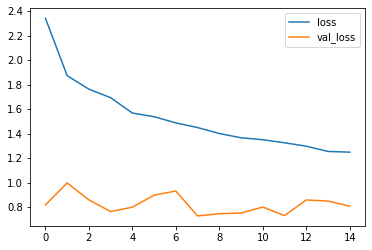

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

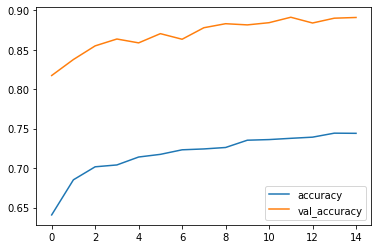

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(model.predict(X_test).argmax(axis=1), y_test))

[[841   3  17  11   0   1 112   0   0   1]
 [  2 972   3   3   2   0   1   0   2   0]
 [ 23   0 812  15  53   0  70   0   5   0]
 [ 24  15   7 918  29   1  28   1   4   0]
 [  2   3  70  26 798   0  76   0   3   0]
 [  1   1   0   0   0 974   0  17   2   8]
 [ 96   5  90  26 115   0 701   0   5   0]
 [  0   0   0   0   0  19   0 954   1  27]
 [ 11   1   1   1   3   0  12   0 976   0]
 [  0   0   0   0   0   5   0  28   2 964]]


In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'True label Shirt, predicted label Dress')

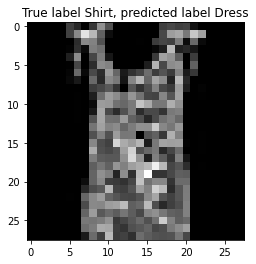

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
plt.title("True label:  %s, predicted label:  %s" % (labels[y_test[i]], labels[y_pred[i]]))